# Auto Mobiles Explanatory Data Analytics


In [1]:
import pandas as pd

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
plt.style.use('ggplot')

<Figure size 800x1000 with 0 Axes>

In [3]:
file = 'Automobile.csv'

In [4]:
df = pd.read_csv(file)
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Column Horsepower indicate a null value

In [8]:
df.horsepower.values

array([130., 165., 150., 150., 140., 198., 220., 215., 225., 190., 170.,
       160., 150., 225.,  95.,  95.,  97.,  85.,  88.,  46.,  87.,  90.,
        95., 113.,  90., 215., 200., 210., 193.,  88.,  90.,  95.,  nan,
       100., 105., 100.,  88., 100., 165., 175., 153., 150., 180., 170.,
       175., 110.,  72., 100.,  88.,  86.,  90.,  70.,  76.,  65.,  69.,
        60.,  70.,  95.,  80.,  54.,  90.,  86., 165., 175., 150., 153.,
       150., 208., 155., 160., 190.,  97., 150., 130., 140., 150., 112.,
        76.,  87.,  69.,  86.,  92.,  97.,  80.,  88., 175., 150., 145.,
       137., 150., 198., 150., 158., 150., 215., 225., 175., 105., 100.,
       100.,  88.,  95.,  46., 150., 167., 170., 180., 100.,  88.,  72.,
        94.,  90.,  85., 107.,  90., 145., 230.,  49.,  75.,  91., 112.,
       150., 110., 122., 180.,  95.,  nan, 100., 100.,  67.,  80.,  65.,
        75., 100., 110., 105., 140., 150., 150., 140., 150.,  83.,  67.,
        78.,  52.,  61.,  75.,  75.,  75.,  97.,  9

There are two 'easy' options to handle the missing value :
- Delete the row that contains missing value. Since the missing value is not that much, could be doesnt really affect on the data itself
- Using statistical methods like average to handle.

In [9]:
#Method 1 - Deleting Row

df2 = df.copy()
df2[df2.horsepower.isnull()]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,usa
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa


In [10]:
df2 = df2.drop(labels=df2[df2.horsepower.isnull()].index, axis=0)


In [11]:
df2.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [12]:
df2.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [13]:
# Let's see the least gas efficient and the most efficient car / mpg
# higher the number indicates good effiecieny

df2.sort_values('mpg',ascending=True)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
28,hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,usa
26,chevy c20,10.0,8,307.0,200.0,4376,15.0,70,usa
25,ford f250,10.0,8,360.0,215.0,4615,14.0,70,usa
27,dodge d200,11.0,8,318.0,210.0,4382,13.5,70,usa
124,oldsmobile omega,11.0,8,350.0,180.0,3664,11.0,73,usa
...,...,...,...,...,...,...,...,...,...
326,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,80,europe
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
325,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe
329,honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,80,japan


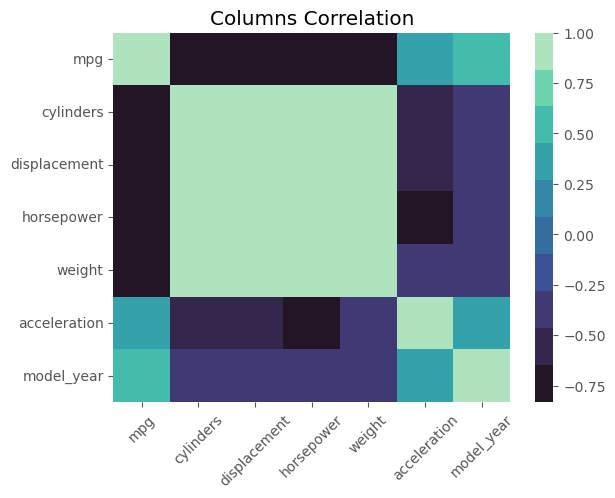

In [14]:
sb.heatmap(df2.corr(numeric_only=True),cmap=sb.color_palette("mako", 10))
plt.xticks(rotation =45)
plt.title('Columns Correlation')
plt.show()

Text(0, 0.5, 'Displacement / Engine Capacity')

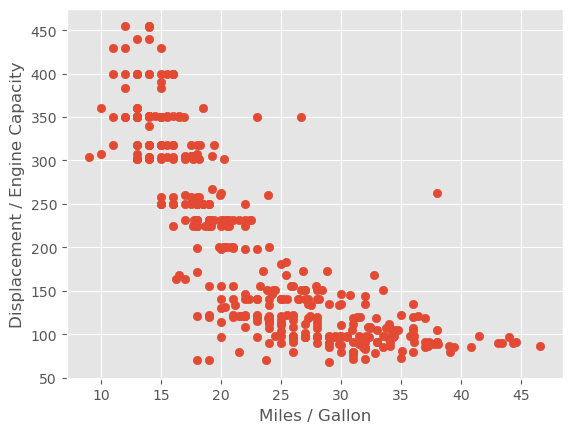

In [15]:
# On the table it seems mpg x displace had a correlation which is the less the displacement the higher mpg got
# let see

plt.scatter(df2.mpg,df2.displacement)
plt.xlabel('Miles / Gallon')
plt.ylabel('Displacement / Engine Capacity')

Apparently based on the data, The Higher MpG get 'mostly' indicates the lower engine capacity has

Text(0, 0.5, 'Horsepower')

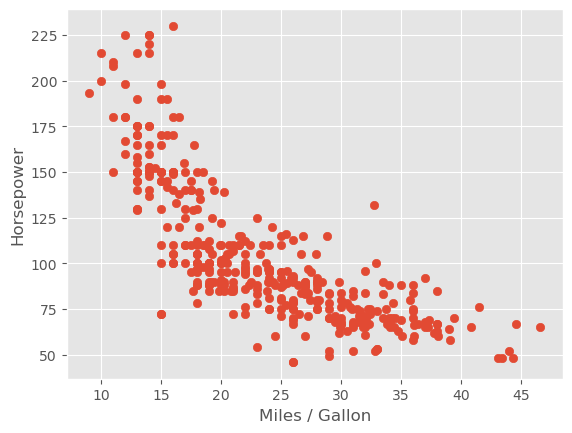

In [16]:
# Does HP / horsepower has a correlation to MpG?

plt.scatter(df2.mpg,df2.horsepower)
plt.xlabel('Miles / Gallon')
plt.ylabel('Horsepower')

It has strong correlation based on the graph, which means More Power More Gas Consumption. More Gas Consumption, Less miles per gallon achieved.

Text(0, 0.5, 'Weight')

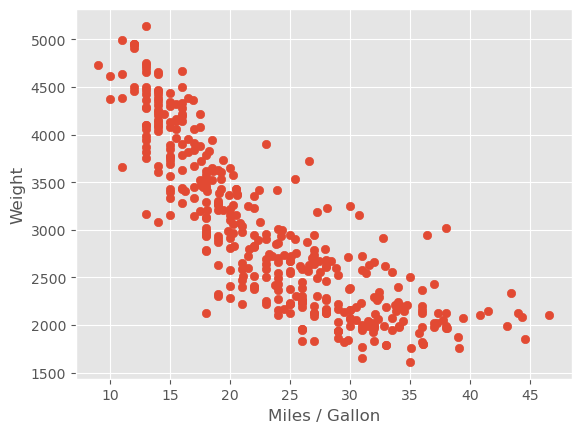

In [17]:
plt.scatter(df2.mpg,df2.weight)
plt.xlabel('Miles / Gallon')
plt.ylabel('Weight')

In [18]:
df2.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

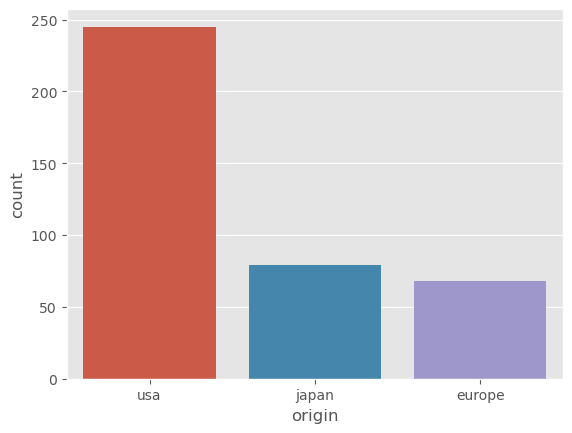

In [19]:
sb.countplot(data=df2,x=df2.origin)
plt.show()

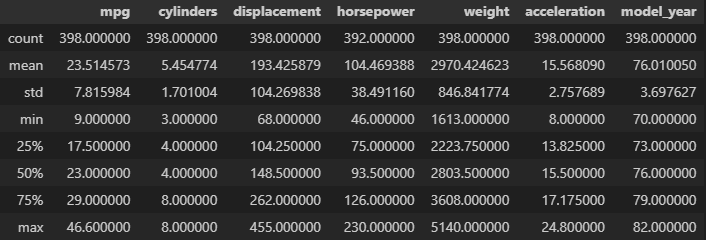

Based on that table we might wanna pick 
the top 25% or 75% for mpg, hp column, displace And The 25% for acceleration and weight

In [20]:
#Therefore


best_car = df2[
    (df2.mpg > 29) 
    # & (df2.displacement > 262)
    & (df2.horsepower > 126) 
    & (df2.weight < 3608) # Using the 75% 
    & (df.acceleration <13.8) 
]

best_car

C:\Users\intel\AppData\Local\Temp\ipykernel_19768\3748547596.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  best_car = df2[


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
333,datsun 280-zx,32.7,6,168.0,132.0,2910,11.4,80,japan


Apparently, we only have one precise Car

In [21]:
# what about the 50%

good_cars = df2[
    (df2.mpg > 23) 
    & (df2.horsepower > 93) 
    & (df2.weight < 2803) 
    & (df.acceleration <15.5) 
]
good_cars

C:\Users\intel\AppData\Local\Temp\ipykernel_19768\3411975433.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_cars = df2[


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
14,toyota corona mark ii,24.0,4,113.0,95.0,2372,15.0,70,japan
23,bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,europe
31,toyota corona,25.0,4,113.0,95.0,2228,14.0,71,japan
122,saab 99le,24.0,4,121.0,110.0,2660,14.0,73,europe
149,honda civic,24.0,4,120.0,97.0,2489,15.0,74,japan
171,toyota corona,24.0,4,134.0,96.0,2702,13.5,75,japan
180,saab 99le,25.0,4,121.0,115.0,2671,13.5,75,europe
267,toyota corona,27.5,4,134.0,95.0,2560,14.2,78,japan
268,datsun 510,27.2,4,119.0,97.0,2300,14.7,78,japan
273,datsun 200-sx,23.9,4,119.0,97.0,2405,14.9,78,japan


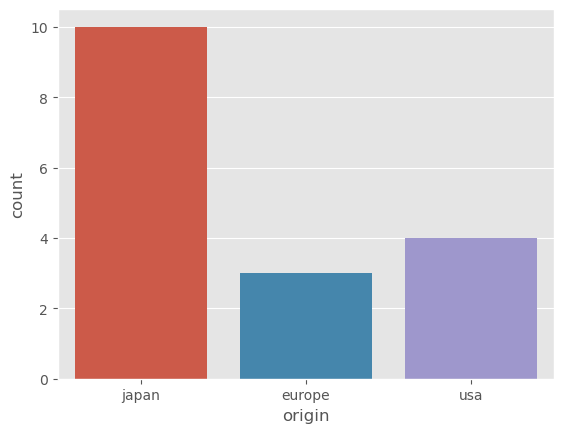

In [22]:
sb.countplot(data = good_cars,x=good_cars.origin)
plt.show()

'Good' Condition Cars are mostly from Japan

In [23]:
good_cars.groupby('origin').count().name

origin
europe     3
japan     10
usa        4
Name: name, dtype: int64

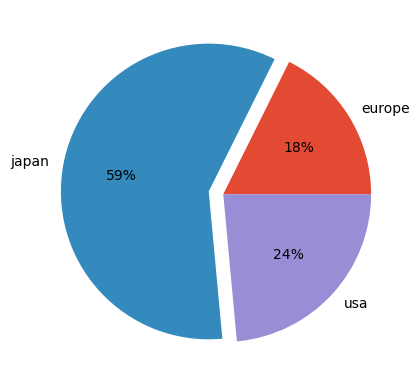

In [24]:
plt.pie(
    good_cars.groupby('origin').count().name,
    labels=good_cars.groupby('origin').count().name.index,
    explode=[0, 0.1, 0,], autopct='%.0f%%'
    )
plt.show()

In [25]:
good_cars[good_cars.origin == 'japan']

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
14,toyota corona mark ii,24.0,4,113.0,95.0,2372,15.0,70,japan
31,toyota corona,25.0,4,113.0,95.0,2228,14.0,71,japan
149,honda civic,24.0,4,120.0,97.0,2489,15.0,74,japan
171,toyota corona,24.0,4,134.0,96.0,2702,13.5,75,japan
267,toyota corona,27.5,4,134.0,95.0,2560,14.2,78,japan
268,datsun 510,27.2,4,119.0,97.0,2300,14.7,78,japan
273,datsun 200-sx,23.9,4,119.0,97.0,2405,14.9,78,japan
334,mazda rx-7 gs,23.7,3,70.0,100.0,2420,12.5,80,japan
357,datsun 200sx,32.9,4,119.0,100.0,2615,14.8,81,japan
390,toyota celica gt,32.0,4,144.0,96.0,2665,13.9,82,japan


In [26]:
#Clustering
features = ['mpg','horsepower','weight','acceleration']
X=df2[features]
X

,mpg,horsepower,weight,acceleration
0,18.0,130.0,3504,12.0
1,15.0,165.0,3693,11.5
2,18.0,150.0,3436,11.0
3,16.0,150.0,3433,12.0
4,17.0,140.0,3449,10.5
...,...,...,...,...
393,27.0,86.0,2790,15.6
394,44.0,52.0,2130,24.6
395,32.0,84.0,2295,11.6
396,28.0,79.0,2625,18.6


In [27]:
from sklearn.cluster import KMeans

d:\Anaconda\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

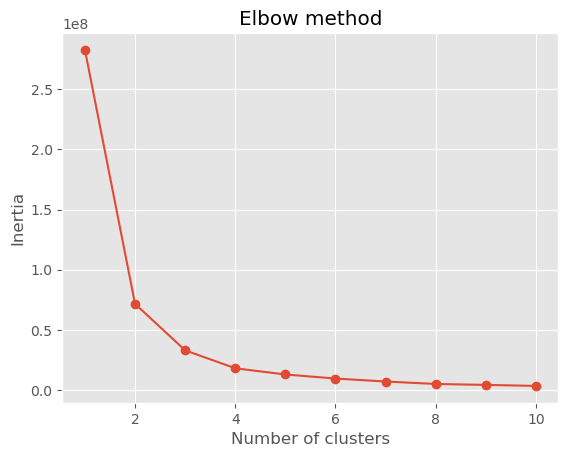

In [28]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)

d:\Anaconda\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [30]:
df2['Class'] = labels

<AxesSubplot: xlabel='Class', ylabel='count'>

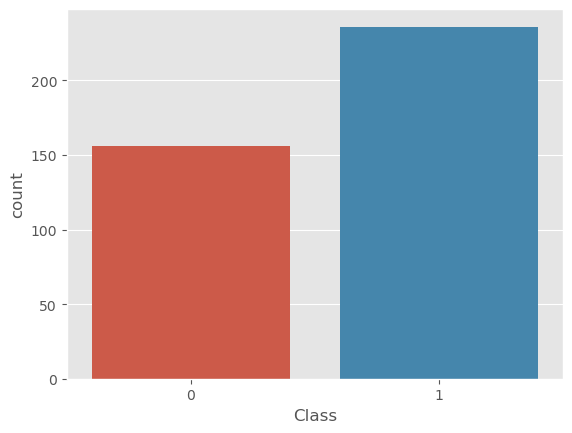

In [31]:
sb.countplot(data=df2,x=df2.Class)

In [32]:
class_1 = df2[df2.Class == 0]
class_2 = df2[df2.Class == 1]

In [33]:
class_1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Class
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,16.453846,7.237179,301.653846,137.564103,3879.532051,14.541667,74.762821,0.0
std,3.692790,1.107815,72.380059,36.943056,504.575701,3.098427,3.125570,0.0
min,9.000000,4.000000,120.000000,67.000000,3139.000000,8.000000,70.000000,0.0
25%,14.000000,6.000000,250.000000,105.000000,3431.500000,12.425000,72.000000,0.0
50%,16.000000,8.000000,305.000000,140.000000,3825.500000,14.000000,75.000000,0.0
75%,18.275000,8.000000,350.000000,155.750000,4282.000000,16.425000,77.000000,0.0
max,30.700000,8.000000,455.000000,230.000000,5140.000000,24.800000,81.000000,0.0


In [34]:
class_2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Class
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.0
mean,28.067797,4.305085,123.523305,82.593220,2381.381356,16.202119,76.783898,1.0
std,6.201316,0.771938,45.639318,18.900518,368.102932,2.286918,3.808154,0.0
min,14.000000,3.000000,68.000000,46.000000,1613.000000,10.000000,70.000000,1.0
25%,23.775000,4.000000,97.000000,70.000000,2106.000000,14.500000,73.000000,1.0
50%,27.100000,4.000000,112.000000,83.500000,2305.000000,16.000000,77.000000,1.0
75%,32.125000,4.000000,140.000000,92.000000,2671.250000,17.500000,80.000000,1.0
max,46.600000,8.000000,455.000000,225.000000,3121.000000,24.600000,82.000000,1.0


In [35]:
df2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.602041
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.490102
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


 Based on comparison between class '0' and class '1' with Raw data (df2) we can sumarize:
 - Class '0' consist cars that are 'not good'
 - Class '1' consist cars that are 'good'

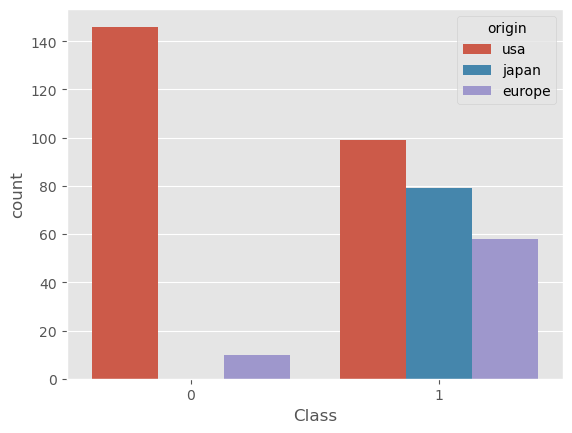

In [36]:
sb.countplot(data=df2,x=df2.Class,hue=df2.origin)
plt.show()

There is no 'bad' car made by japan

Since Null Values in total aren't much, the result between two method are likely same